In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from numpy import where
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import statsmodels.api as sm
import seaborn as sns


# 1. Cluster

data:

https://nhts.ornl.gov/downloads

https://nhts.ornl.gov/

In [2]:
person = pd.read_csv('perpub.csv')
person

HOUSEID  PERSONID  R_AGE  EDUC  R_HISP  R_RELAT  R_SEX  R_RACE  \
0       30000007         1     67     3       2        1      2       2   
1       30000007         2     66     3       2        2      1       2   
2       30000007         3     28     2       2        3      2       2   
3       30000008         1     55     5       2        1      1       1   
4       30000008         2     49     4       2        2      2       1   
...          ...       ...    ...   ...     ...      ...    ...     ...   
264229  40794301         4     18     2       2        3      2       1   
264230  40794301         5     14     1       2        3      2       1   
264231  40794301         6     12    -1       2        3      2       1   
264232  40794301         7      8    -1       2        3      2       1   
264233  50515573         1     52     5       2        1      1       1   

        PRMACT  PAYPROF  ...  SMPLSRCE    WTPERFIN  HBHUR  HTHTNRNT  HTPPOPDN  \
0            6        2  ...         2  206.690153      T        50      1500   
1            1       -1  ...         2  197.075742      T        50      1500   
2            5        2  ...         2  219.514210      T        50      1500   
3            1       -1  ...         2   63.185911      R         5       300   
4            1       -1  ...         2   58.665911      R         5       300   
...        ...      ...  ...       ...         ...    ...       ...       ...   
264229      97        2  ...         2  213.514657      R        20        50   
264230      -1       -1  ...         2  133.448420      R        20        50   
264231      -1       -1  ...         2  133.448420      R        20        50   
264232      -1       -1  ...         2  133.448420      R        20        50   
264233       1       -1  ...         1  611.938240      U        70     30000   

        HTRESDN  HTEEMPDN  HBHTNRNT  HBPPOPDN  HBRESDN  
0           750       750        20       750      300  
1           750       750        20       750      300  
2           750       750        20       750      300  
3           300       150         5       300      300  
4           300       150         5       300      300  
...         ...       ...       ...       ...      ...  
264229       50        25        20       300       50  
264230       50        25        20       300       50  
264231       50        25        20       300       50  
264232       50        25        20       300       50  
264233    30000      5000        70     30000    17000  

[264234 rows x 121 columns]

In [88]:
person.columns.values

array(['HOUSEID', 'PERSONID', 'R_AGE', 'EDUC', 'R_HISP', 'R_RELAT',
       'R_SEX', 'R_RACE', 'PRMACT', 'PAYPROF', 'GT1JBLWK', 'WRK_HOME',
       'WKFTPT', 'WRKTRANS', 'LSTTRDAY17', 'OCCAT', 'SCHTYP', 'NWALKTRP',
       'WALK4EX', 'NBIKETRP', 'BIKE4EX', 'BIKESHARE', 'PTUSED', 'MCUSED',
       'CARSHARE', 'RIDESHARE', 'CARRODE', 'TIMETOWK', 'NOCONG',
       'PUBTIME', 'WRKTIME', 'WKRMHM', 'FLEXTIME', 'WKFMHMXX', 'SCHTRN1',
       'SCHTRN2', 'DELIVER', 'MEDCOND', 'MEDCOND6', 'HEALTH', 'PHYACT',
       'VPACT', 'LPACT', 'BORNINUS', 'YRTOUS', 'YEARMILE', 'PROXY',
       'WHOPROXY', 'USEPUBTR', 'SAMEPLC', 'W_NONE', 'W_CANE', 'W_WLKR',
       'W_WHCANE', 'W_DOG', 'W_CRUTCH', 'W_SCOOTR', 'W_CHAIR', 'W_MTRCHR',
       'WORKER', 'DIARY', 'OUTCNTRY', 'FRSTHM17', 'CNTTDTR', 'GCDWORK',
       'WKSTFIPS', 'DRIVER', 'OUTOFTWN', 'DISTTOWK17', 'DISTTOSC17',
       'R_AGE_IMP', 'R_SEX_IMP', 'ALT_16', 'ALT_23', 'ALT_45', 'WALK_DEF',
       'WALK_GKQ', 'BIKE_DFR', 'BIKE_GKP', 'CONDTRAV', 'CONDRIDE',
    

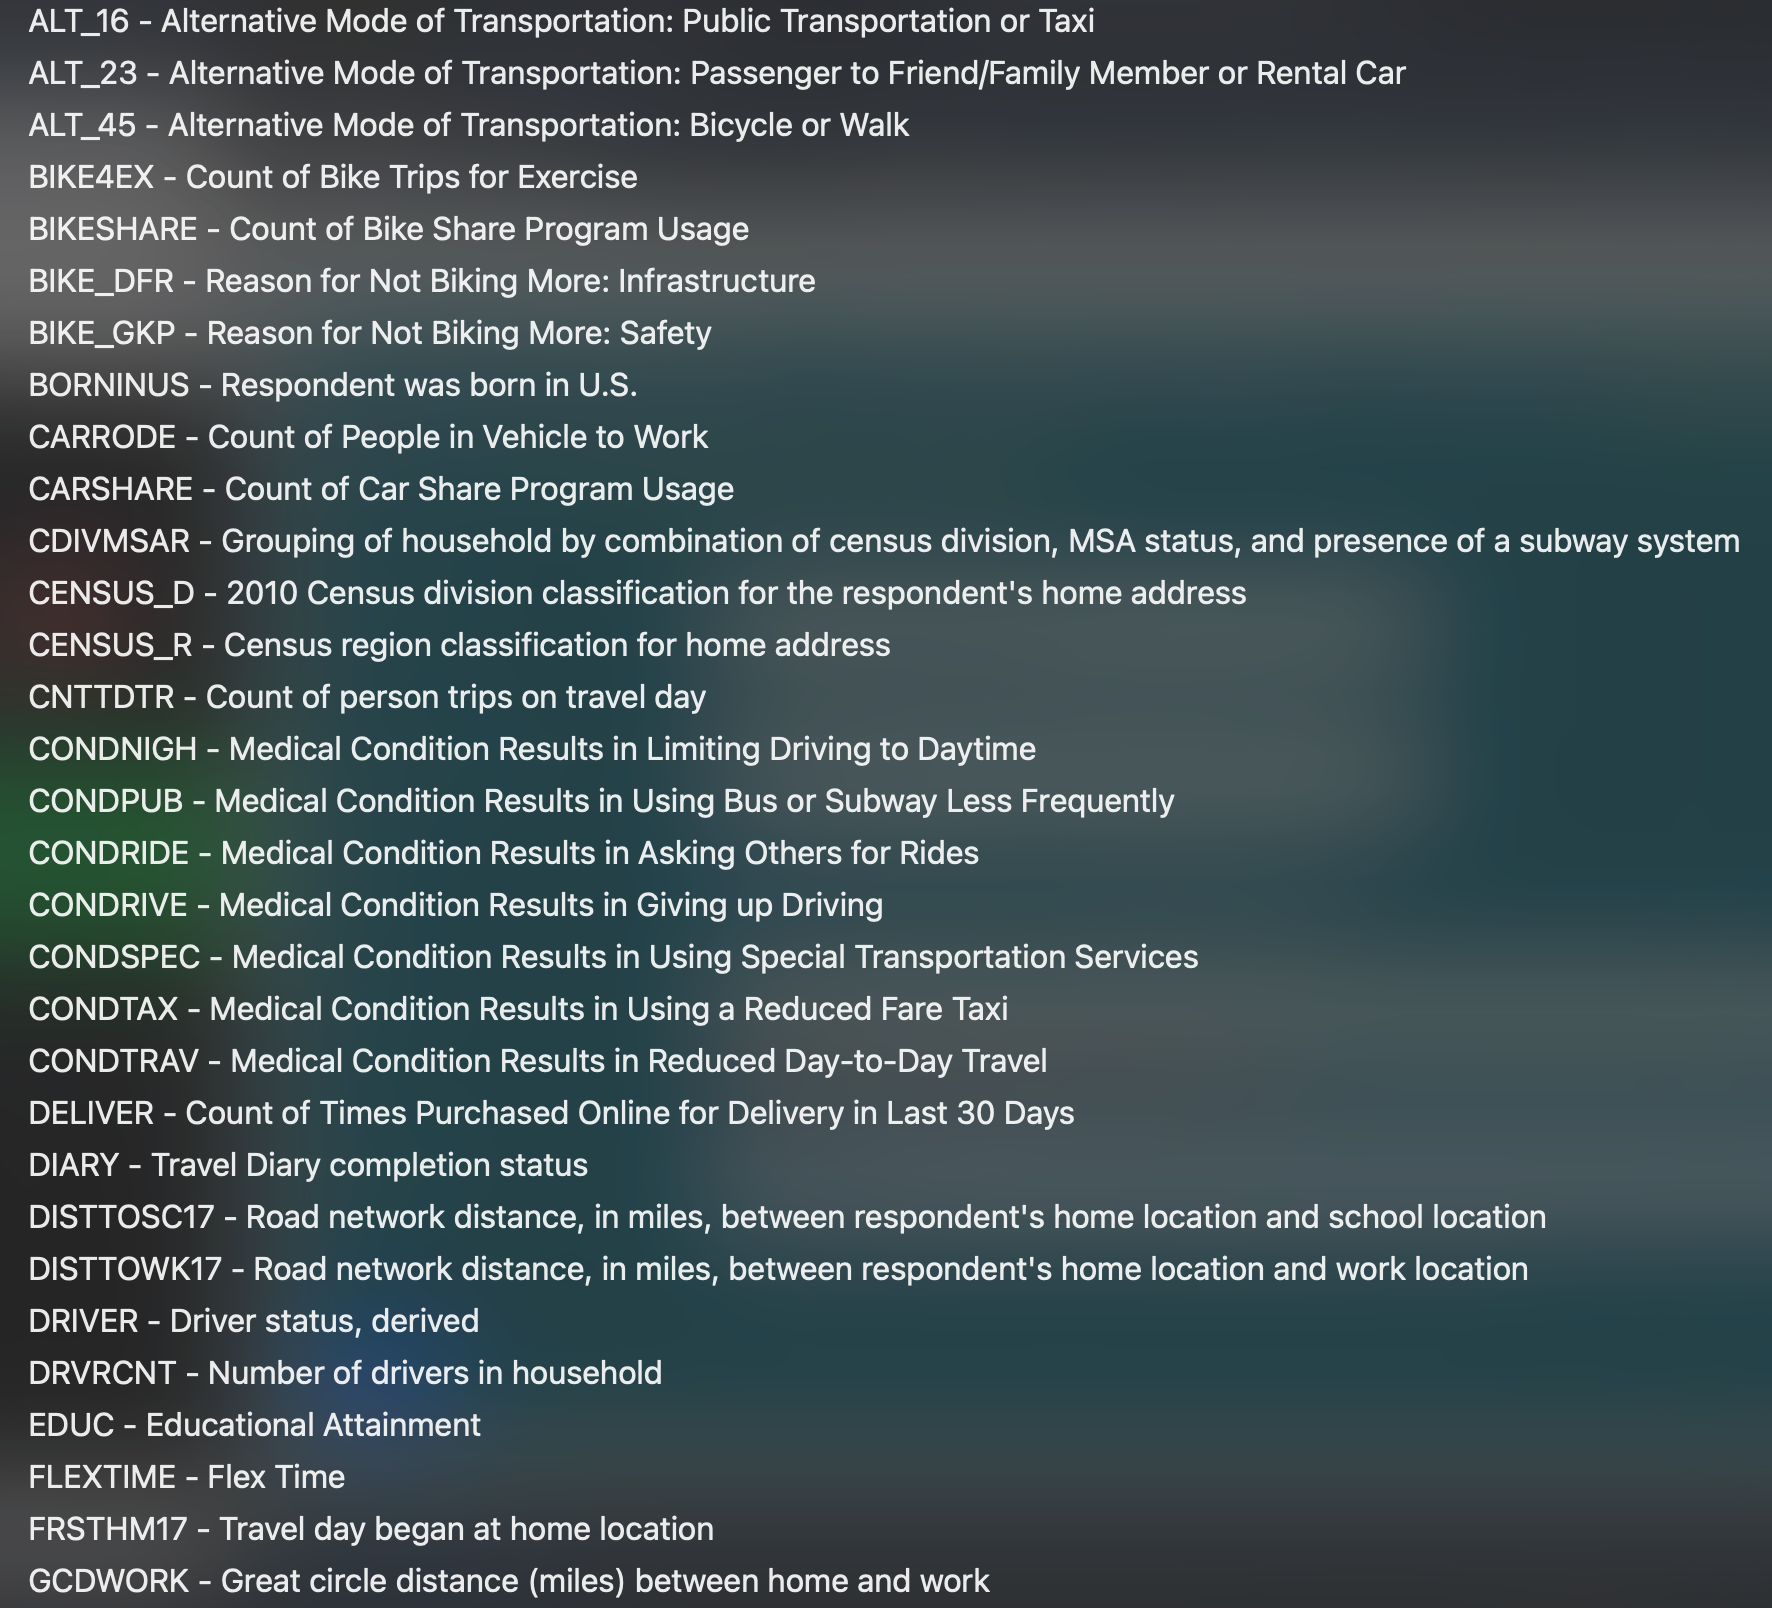
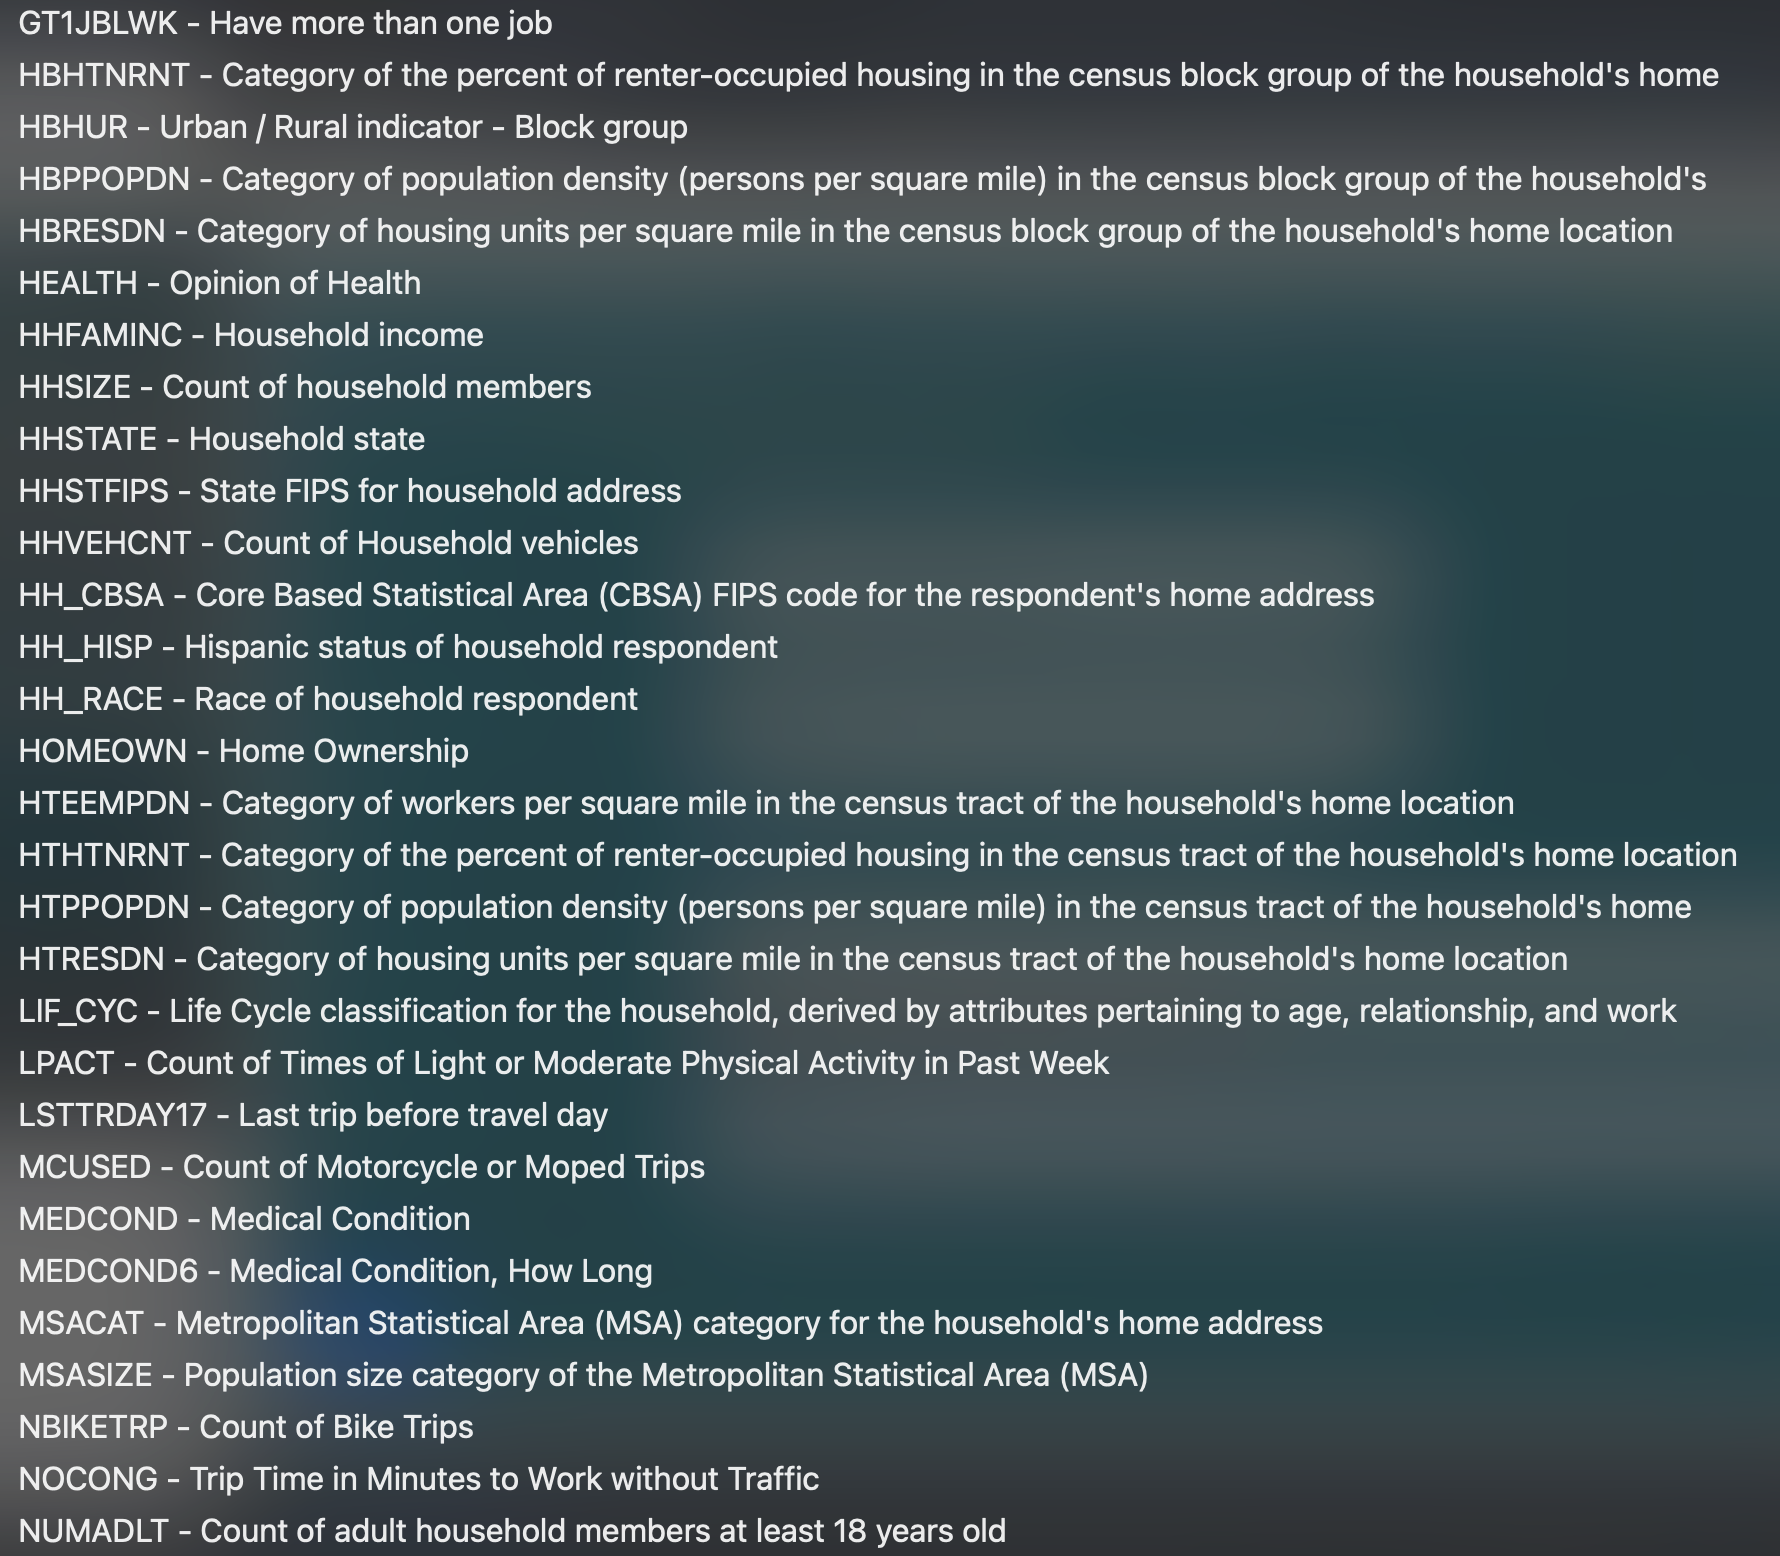
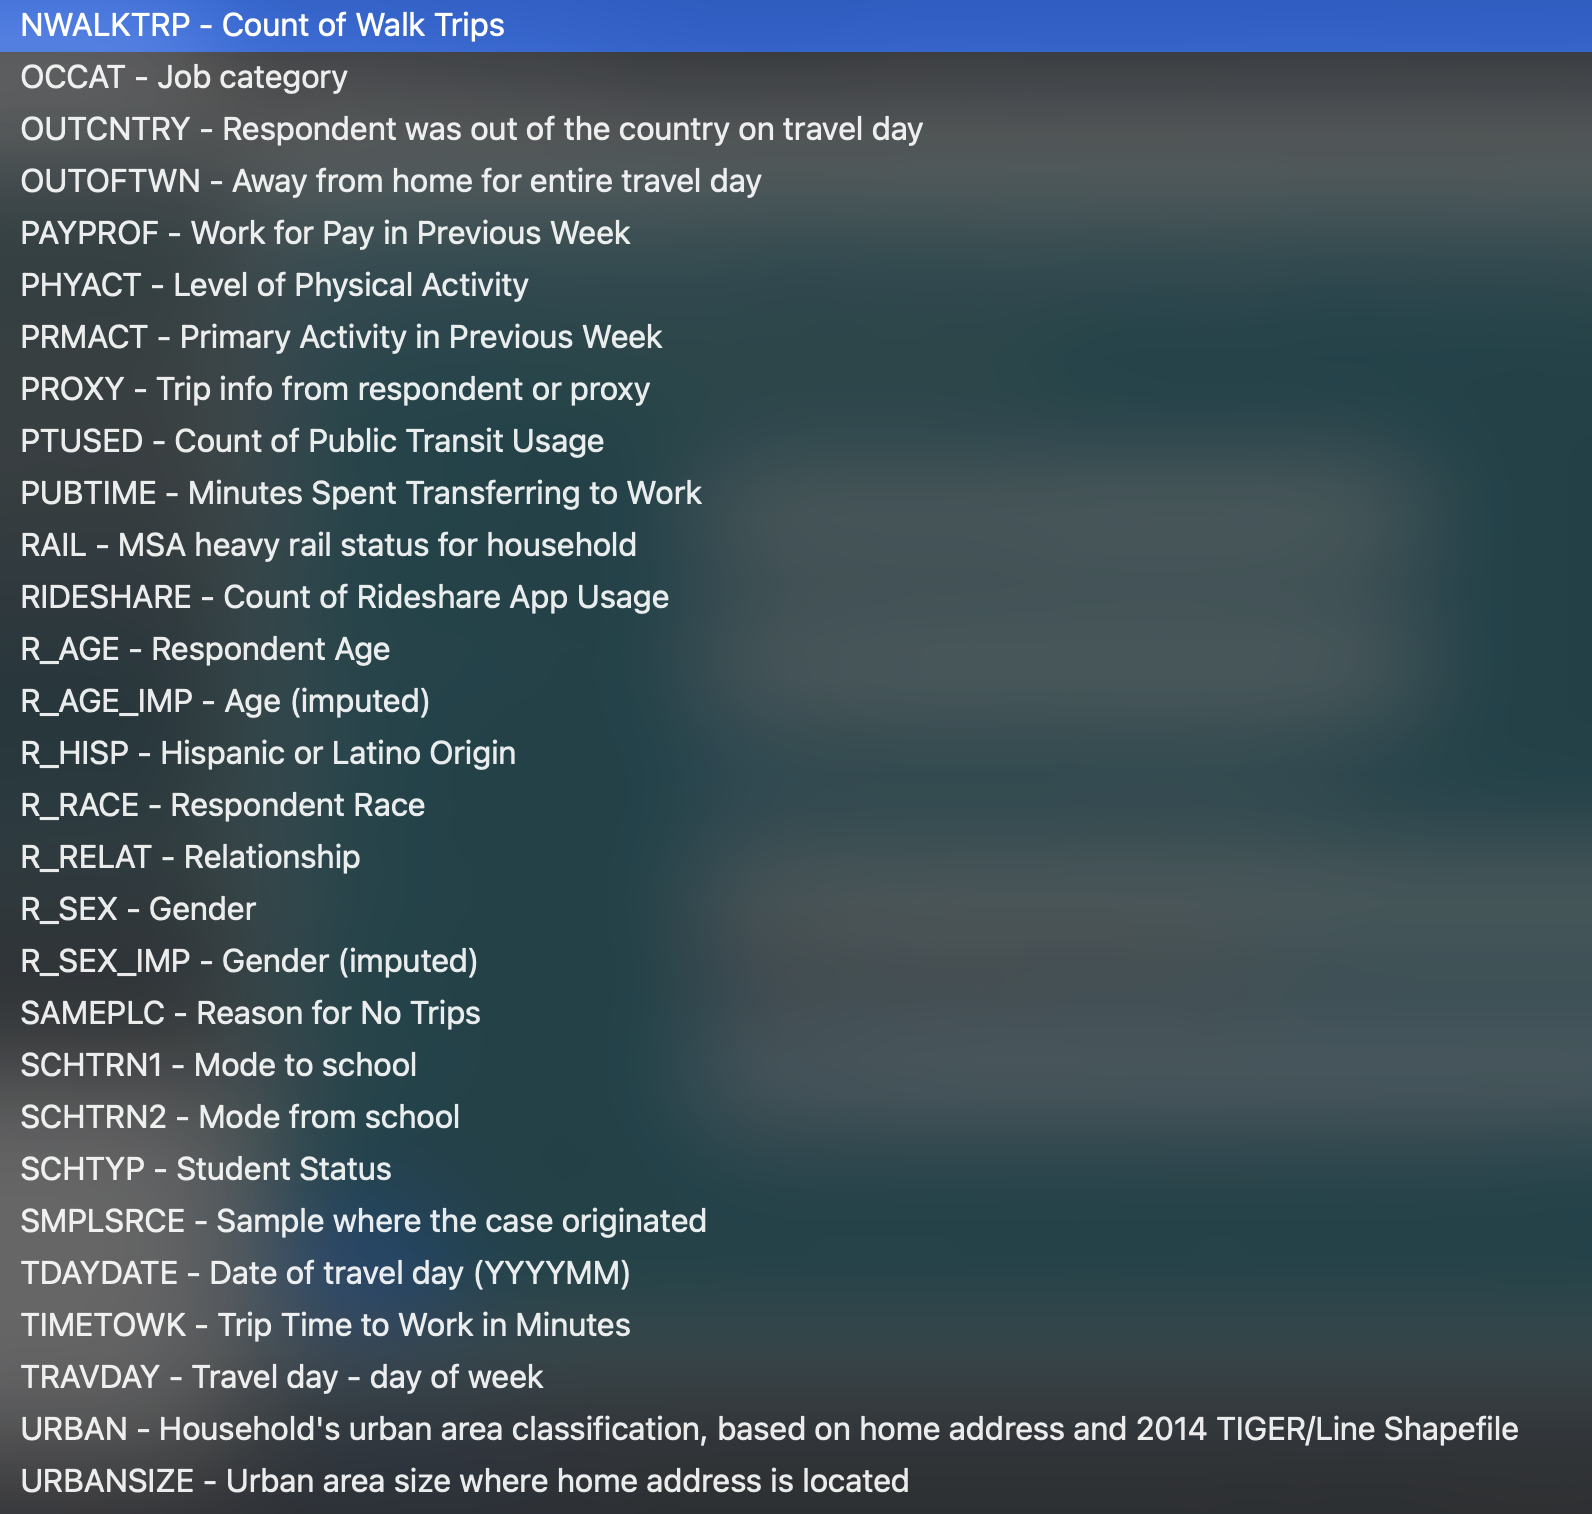
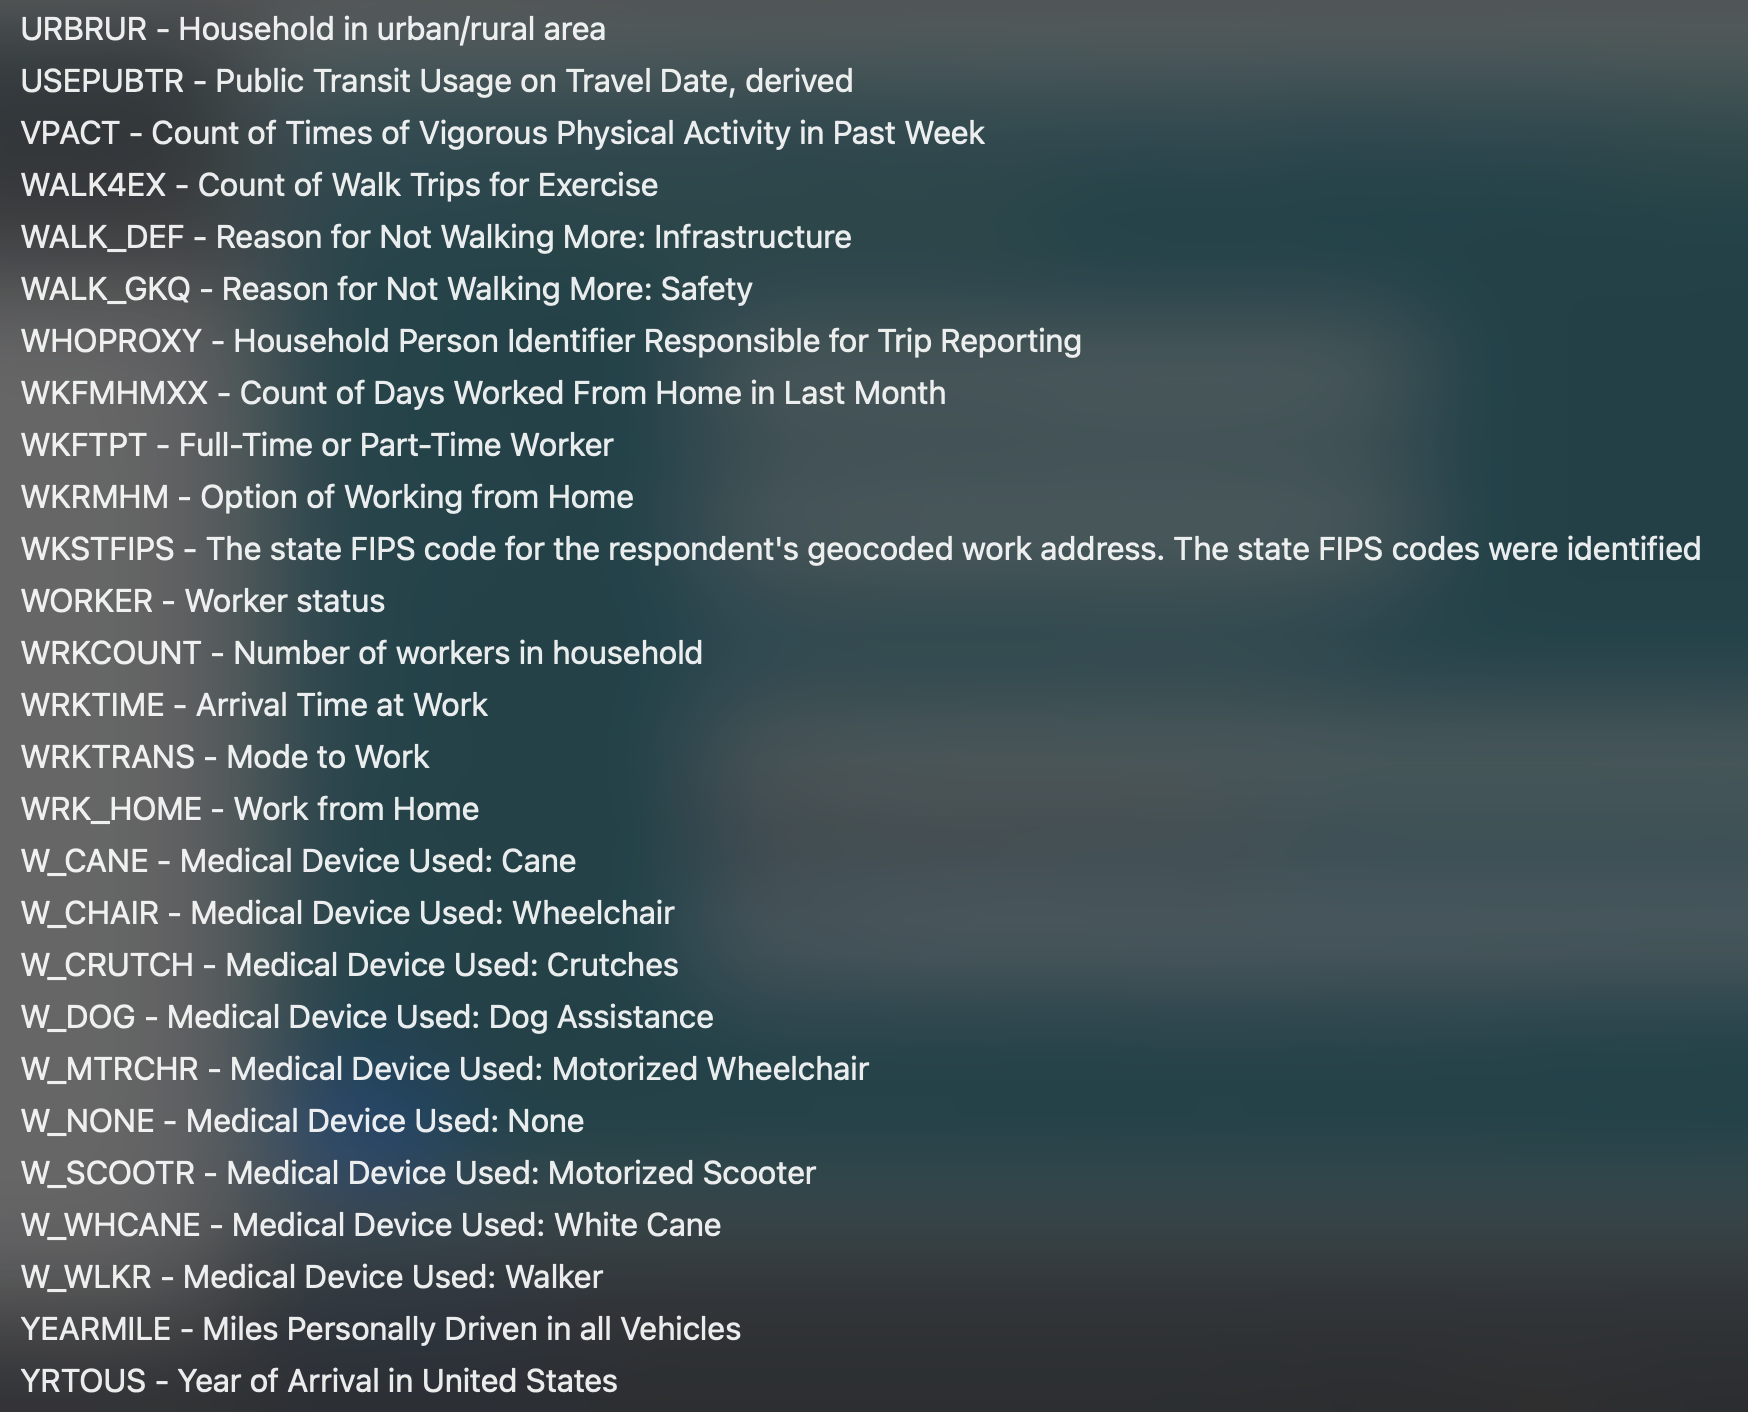

value $EDUCf /*EDUC*/
	'-1'="Appropriate skip"
	'-7'="I prefer not to answer"
	'-8'="I don't know"
	'01'="Less than a high school graduate"
	'02'="High school graduate or GED"
	'03'="Some college or associates degree"
	'04'="Bachelor's degree"
	'05'="Graduate degree or professional degree"
value R_AGEf /*R_AGE*/
		-8="I don't know"
		-7="I prefer not to answer"
value $PRMACTf /*PRMACT*/
	'-1'="Appropriate skip"
	'-7'="I prefer not to answer"
	'-8'="I don't know"
	'01'="Working"
	'02'="Temporarily absent from a job or business"
	'03'="Looking for work / unemployed"
	'04'="A homemaker"
	'05'="Going to school"
	'06'="Retired"
	'97'="Something else"
value $OCCATf /*OCCAT*/
	'-1'="Appropriate skip"
	'-7'="I prefer not to answer"
	'-8'="I don't know"
	'-9'="Not ascertained"
	'01'="Sales or service"
	'02'="Clerical or administrative support"
	'03'="Manufacturing, construction, maintenance, or farming"
	'04'="Professional, managerial, or technical"
	'97'="Something else"
value $WRKTRANSf /*WRKTRANS*/
	'-1'="Appropriate skip"
	'-7'="I prefer not to answer"
	'-8'="I don't know"
	'-9'="Not ascertained"
	'01'="Walk"
	'02'="Bicycle"
	'03'="Car"
	'04'="SUV"
	'05'="Van"
	'06'="Pickup truck"
	'07'="Golf cart / Segway"
	'08'="Motorcycle / Moped"
	'09'="RV (motor home, ATV, snowmobile)"
	'10'="School bus"
	'11'="Public or commuter bus"
	'12'="Paratransit / Dial-a-ride"
	'13'="Private / Charter / Tour / Shuttle bus"
	'14'="City-to-city bus (Greyhound, Megabus)"
	'15'="Amtrak / Commuter rail"
	'16'="Subway / Elevated / Light rail / Street car"
	'17'="Taxi / Limo (including Uber / Lyft)"
	'18'="Rental car (including Zipcar / Car2Go)"
	'19'="Airplane"
	'20'="Boat / Ferry / Water taxi"
	'97'="Something Else"
value DISTTOWK17f /*DISTTOWK17*/
	-9="Not ascertained"
	0.0 - 0.499999 = 'Less than 0.5 miles'
	0.5 - 1.499999 = '0.5 - 1.49 miles'
	1.5 - 2.499999 = '1.5 - 2.49 miles'
	2.5 - 3.499999 = '2.5 - 3.49 miles'
	3.5 - 4.499999 = '3.5 - 4.49 miles'
	4.5 - 5.499999 = '4.5 - 5.49 miles'
    5.5 -10.499999 = '5.5 - 10.49 miles'
    10.5-15.499999 = '10.5 - 15.49 miles'
    15.5-20.499999 = '15.5 - 20.49 miles'
    20.5-30.499999 = '20.5 - 30.49 miles'
    30.5-high  = '30.5 miles or more'

In [10]:
# attri = ['PERSONID','R_AGE','EDUC','PRMACT', 'WRKTRANS','OCCAT','DISTTOWK17','DRIVER','HHFAMINC']
attri = ['HOUSEID','PERSONID','R_AGE', 'WRKTRANS','OCCAT','DISTTOWK17','DRIVER','HHFAMINC','HHSIZE','NUMADLT']
p = person[attri]
# p = person
p['NUMCHD'] = p['HHSIZE']- p['NUMADLT']
p

d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


HOUSEID  PERSONID  R_AGE  WRKTRANS  OCCAT  DISTTOWK17  DRIVER  \
0       30000007         1     67        -1     -1       -9.00       1   
1       30000007         2     66         6      2       82.61       1   
2       30000007         3     28        -1     -1       -9.00       1   
3       30000008         1     55         6      4        8.11       1   
4       30000008         2     49         3      2        3.07       1   
...          ...       ...    ...       ...    ...         ...     ...   
264229  40794301         4     18        -1     -1       -9.00       1   
264230  40794301         5     14        -1     -1       -9.00      -1   
264231  40794301         6     12        -1     -1       -9.00      -1   
264232  40794301         7      8        -1     -1       -9.00      -1   
264233  50515573         1     52         1      4        1.47       1   

        HHFAMINC  HHSIZE  NUMADLT  NUMCHD  
0              7       3        3       0  
1              7       3        3       0  
2              7       3        3       0  
3              8       2        2       0  
4              8       2        2       0  
...          ...     ...      ...     ...  
264229         6       7        4       3  
264230         6       7        4       3  
264231         6       7        4       3  
264232         6       7        4       3  
264233        10       1        1       0  

[264234 rows x 11 columns]

In [11]:
p['NUMCHD'].value_counts()

0    178476
2     34266
1     32080
3     13261
4      4143
5      1213
6       482
7       209
8       104
Name: NUMCHD, dtype: int64

In [43]:
p[p['DISTOSC17']<0]

KeyError: 'DISTOSC17'

In [12]:
pp = p.drop(p[(p['R_AGE']==-7) | (p['R_AGE']==-8)].index)
# pp = pp.drop(pp[pp['EDUC']<0].index)
# pp = pp.drop(pp[pp['PRMACT']<0].index)
pp = pp.drop(pp[pp['WRKTRANS']<0].index)
pp = pp.drop(pp[pp['OCCAT']<0].index)
pp = pp.drop(pp[pp['DISTTOWK17']<0].index)
pp = pp.drop(pp[pp['DRIVER']<0].index)
pp = pp.drop(pp[pp['HHFAMINC']<0].index)
pp

HOUSEID  PERSONID  R_AGE  WRKTRANS  OCCAT  DISTTOWK17  DRIVER  \
1       30000007         2     66         6      2       82.61       1   
3       30000008         1     55         6      4        8.11       1   
4       30000008         2     49         3      2        3.07       1   
5       30000012         1     45         3      4        6.82       1   
10      30000039         1     82         4      4       11.62       1   
...          ...       ...    ...       ...    ...         ...     ...   
264213  40794238         2     40         3      4       18.20       1   
264216  40794241         2     39         4      4       12.50       1   
264218  40794260         1     35         4      4       10.57       1   
264227  40794301         2     59         6      4       11.41       1   
264233  50515573         1     52         1      4        1.47       1   

        HHFAMINC  HHSIZE  NUMADLT  NUMCHD  
1              7       3        3       0  
3              8       2        2       0  
4              8       2        2       0  
5             10       1        1       0  
10            10       2        2       0  
...          ...     ...      ...     ...  
264213         7       3        2       1  
264216         6       2        2       0  
264218        11       4        1       3  
264227         6       7        4       3  
264233        10       1        1       0  

[104264 rows x 11 columns]

In [13]:
pp.describe()

HOUSEID       PERSONID          R_AGE       WRKTRANS  \
count  1.042640e+05  104264.000000  104264.000000  104264.000000   
mean   3.499273e+07       1.574436      45.493996       4.409825   
std    5.051354e+06       0.746259      14.469441       6.475248   
min    3.000001e+07       1.000000      16.000000       1.000000   
25%    3.025866e+07       1.000000      33.000000       3.000000   
50%    3.052092e+07       1.000000      47.000000       3.000000   
75%    4.036592e+07       2.000000      57.000000       4.000000   
max    5.051557e+07      10.000000      92.000000      97.000000   

               OCCAT     DISTTOWK17         DRIVER       HHFAMINC  \
count  104264.000000  104264.000000  104264.000000  104264.000000   
mean        3.088947      22.196614       1.029646       6.893942   
std         3.529218     110.463304       0.169609       2.397202   
min         1.000000       0.000000       1.000000       1.000000   
25%         2.000000       3.940000       1.000000       5.000000   
50%         4.000000       9.190000       1.000000       7.000000   
75%         4.000000      18.130000       1.000000       9.000000   
max        97.000000    3232.910000       2.000000      11.000000   

              HHSIZE        NUMADLT         NUMCHD  
count  104264.000000  104264.000000  104264.000000  
mean        2.692156       2.120013       0.572144  
std         1.312240       0.818624       0.967992  
min         1.000000       1.000000       0.000000  
25%         2.000000       2.000000       0.000000  
50%         2.000000       2.000000       0.000000  
75%         4.000000       2.000000       1.000000  
max        13.000000      10.000000       8.000000

## 1

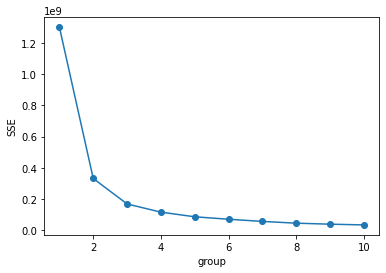

In [14]:
SSE = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(pp[['R_AGE', 'WRKTRANS','OCCAT','DISTTOWK17','DRIVER','HHFAMINC','NUMCHD']])
    SSE.append(km.inertia_)
plt.plot(range(1,11), SSE, marker='o')
plt.xlabel(u'group')
plt.ylabel(u'SSE')
plt.show()

In [164]:
#n_cluster = 6
kmodel = KMeans(n_clusters=6)
kmodel.fit(pp[['R_AGE', 'WRKTRANS','OCCAT','DISTTOWK17','DRIVER','HHFAMINC','NUMCHD']])
label = pd.Series(kmodel.labels_)
num = pd.Series(kmodel.labels_).value_counts()
center = pd.DataFrame(kmodel.cluster_centers_)
r = pd.concat([center, num], axis = 1)
r.columns = list(pp[['R_AGE', 'WRKTRANS','OCCAT','DISTTOWK17','DRIVER','HHFAMINC','NUMCHD']].columns) + [u'num']
print(r)

       R_AGE   WRKTRANS     OCCAT   DISTTOWK17    DRIVER  HHFAMINC    NUMCHD  \
0  32.054490   4.319865  3.040020    12.010887  1.044943  6.705536  0.880834   
1  45.093750  11.562500  4.725000  1502.364687  1.006250  7.468750  0.581250   
2  44.235294  12.500000  2.843137  2506.933039  1.019608  7.313725  0.490196   
3  46.321995   7.738095  3.239229   252.536882  1.024943  7.426304  0.536281   
4  56.755906   4.347522  3.124390    14.338648  1.017062  7.039973  0.313398   
5  47.049822  14.373665  2.893238   819.021032  1.010676  7.149466  0.644128   

     num  
0  46938  
1    160  
2    102  
3    883  
4  55900  
5    281  


In [166]:
#n_cluster = 7
kmodel = KMeans(n_clusters=7)
kmodel.fit(pp[['R_AGE', 'WRKTRANS','OCCAT','DISTTOWK17','DRIVER','HHFAMINC','NUMCHD']])
label = pd.Series(kmodel.labels_)
num = pd.Series(kmodel.labels_).value_counts()
center = pd.DataFrame(kmodel.cluster_centers_)
r = pd.concat([center, num], axis = 1)
r.columns = list(pp[['R_AGE', 'WRKTRANS','OCCAT','DISTTOWK17','DRIVER','HHFAMINC','NUMCHD']].columns) + [u'num']
print(r)

       R_AGE   WRKTRANS     OCCAT   DISTTOWK17    DRIVER  HHFAMINC    NUMCHD  \
0  56.786087   4.340799  3.124679    13.851849  1.017068  7.038299  0.311851   
1  46.906593  14.681319  3.401099  1161.670989  1.016484  7.269231  0.593407   
2  46.821782   7.334653  3.256436   211.560693  1.024752  7.409901  0.516832   
3  43.132353  11.264706  2.823529  2695.326176  1.014706  7.544118  0.514706   
4  46.133333  12.266667  2.850980   651.683216  1.007843  7.094118  0.666667   
5  32.051979   4.319353  3.039405    12.134487  1.044925  6.706349  0.881956   
6  45.074766  11.869159  4.831776  1855.590374  1.009346  7.588785  0.551402   

     num  
0  55729  
1    182  
2   1011  
3     68  
4    255  
5  46912  
6    107  


## 2

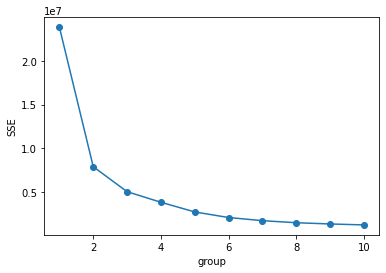

In [167]:
SSE = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(pp[['R_AGE','OCCAT','DRIVER','HHFAMINC','NUMCHD']])
    SSE.append(km.inertia_)
plt.plot(range(1,11), SSE, marker='o')
plt.xlabel(u'group')
plt.ylabel(u'SSE')
plt.show()

In [168]:
#n_cluster = 5
kmodel = KMeans(n_clusters=6)
kmodel.fit(pp[['R_AGE','OCCAT','DRIVER','HHFAMINC','NUMCHD']])
label = pd.Series(kmodel.labels_)
num = pd.Series(kmodel.labels_).value_counts()
center = pd.DataFrame(kmodel.cluster_centers_)
r = pd.concat([center, num], axis = 1)
r.columns = list(pp[['R_AGE','OCCAT','DRIVER','HHFAMINC','NUMCHD']].columns) + [u'num']
print(r)

       R_AGE      OCCAT    DRIVER  HHFAMINC    NUMCHD    num
0  66.871114   2.865840  1.017395  6.646281  0.050199  14602
1  23.903466   2.487833  1.075872  6.171488  0.506944  17423
2  56.437403   3.039929  1.016902  7.114607  0.192725  26447
3  46.264734   3.152086  1.019148  7.290470  0.889987  22770
4  34.893150   3.153416  1.027389  6.959986  1.076359  22893
5  43.550388  97.000000  1.038760  5.558140  0.666667    129


## 3

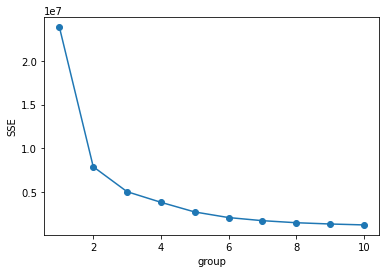

In [169]:
SSE = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(pp[['R_AGE','OCCAT','HHFAMINC','NUMCHD']])
    SSE.append(km.inertia_)
plt.plot(range(1,11), SSE, marker='o')
plt.xlabel(u'group')
plt.ylabel(u'SSE')
plt.show()

In [91]:
#n_cluster = 6
kmodel = KMeans(n_clusters=6)
kmodel.fit(pp[['R_AGE','OCCAT','HHFAMINC','NUMCHD']])
label = pd.Series(kmodel.labels_)
lb = kmodel.predict(pp[['R_AGE','OCCAT','HHFAMINC','NUMCHD']])

num = pd.Series(kmodel.labels_).value_counts()
center = pd.DataFrame(kmodel.cluster_centers_)
r = pd.concat([center, num], axis = 1)
r.columns = list(pp[['R_AGE','OCCAT','HHFAMINC','NUMCHD']].columns) + [u'num']
print(r)

       R_AGE      OCCAT  HHFAMINC    NUMCHD    num
0  56.856154   3.034965  7.093112  0.183706  28586
1  34.875185   3.155866  6.971910  1.073992  22900
2  46.264734   3.152086  7.290470  0.889987  22770
3  23.882909   2.481906  6.152530  0.507779  17416
4  43.550388  97.000000  5.558140  0.666667    129
5  67.713551   2.847136  6.614668  0.046269  12463


In [97]:
pca = PCA(n_components=2, random_state=42)
pca = pca.fit(pp[['R_AGE','OCCAT','HHFAMINC','NUMCHD']])
pca_feature = pca.transform(pp[['R_AGE','OCCAT','HHFAMINC','NUMCHD']])

In [127]:
new_p = pp[['HOUSEID','PERSONID','R_AGE','OCCAT','HHFAMINC','NUMCHD']]
new_p['LABEL'] = lb
new_p

/var/folders/_k/4y8bdj3n20b_tmdbnygz__1c0000gn/T/ipykernel_7270/4095665461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_p['LABEL'] = lb


HOUSEID  PERSONID  R_AGE  OCCAT  HHFAMINC  NUMCHD  LABEL
1       30000007         2     66      2         7       0      5
3       30000008         1     55      4         8       0      0
4       30000008         2     49      2         8       0      2
5       30000012         1     45      4        10       0      2
10      30000039         1     82      4        10       0      5
...          ...       ...    ...    ...       ...     ...    ...
264213  40794238         2     40      4         7       1      1
264216  40794241         2     39      4         6       0      1
264218  40794260         1     35      4        11       3      1
264227  40794301         2     59      4         6       3      0
264233  50515573         1     52      4        10       0      0

[104264 rows x 7 columns]

In [141]:
sns.FacetGrid(new_p, hue='LABEL',size=5)\
              .map(plt.scatter,\
                   .add_legend()

SyntaxError: invalid syntax (4275141533.py, line 3)

## 4

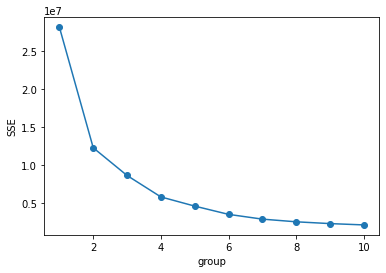

In [173]:
SSE = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(pp[['R_AGE','WRKTRANS','OCCAT','HHFAMINC','NUMCHD']])
    SSE.append(km.inertia_)
plt.plot(range(1,11), SSE, marker='o')
plt.xlabel(u'group')
plt.ylabel(u'SSE')
plt.show()

In [176]:
#n_cluster = 5
kmodel = KMeans(n_clusters=5)
kmodel.fit(pp[['R_AGE','WRKTRANS','OCCAT','HHFAMINC','NUMCHD']])
label = pd.Series(kmodel.labels_)
num = pd.Series(kmodel.labels_).value_counts()
center = pd.DataFrame(kmodel.cluster_centers_)
r = pd.concat([center, num], axis = 1)
r.columns = list(pp[['R_AGE','WRKTRANS','OCCAT','HHFAMINC','NUMCHD']].columns) + [u'num']
print(r)

       R_AGE   WRKTRANS     OCCAT  HHFAMINC    NUMCHD    num
0  52.369607   4.046267  3.151468  7.206845  0.430194  32053
1  38.489436   4.108768  3.360777  7.186407  1.168297  27359
2  45.870670  97.000000  3.362587  6.715935  0.602771    433
3  64.536402   3.966730  3.037400  6.768745  0.061275  22032
4  25.380231   3.942464  2.708590  6.209062  0.545107  22387


# 2. Emission

In [15]:
trip = pd.read_csv('trippub.csv')
trip

HOUSEID  PERSONID  TDTRPNUM  STRTTIME  ENDTIME  TRVLCMIN  TRPMILES  \
0       30000007         1         1      1000     1015        15     5.244   
1       30000007         1         2      1510     1530        20     5.149   
2       30000007         2         1       700      900       120    84.004   
3       30000007         2         2      1800     2030       150    81.628   
4       30000007         3         1       845      900        15     2.250   
...          ...       ...       ...       ...      ...       ...       ...   
923567  50515573         1         1       810      837        27     1.168   
923568  50515573         1         2      1320     1328         8     0.238   
923569  50515573         1         3      1415     1420         5     0.238   
923570  50515573         1         4      1820     1845        25     0.867   
923571  50515573         1         5      1848     1855         7     0.325   

        TRPTRANS  TRPACCMP  TRPHHACC  ...  OBHTNRNT  OBPPOPDN  OBRESDN  \
0              3         0         0  ...        20       750      300   
1              3         0         0  ...        30       300      300   
2              6         0         0  ...        40      1500      750   
3              6         0         0  ...        20       750      300   
4              3         0         0  ...        20       750      300   
...          ...       ...       ...  ...       ...       ...      ...   
923567         1         0         0  ...        70     30000    17000   
923568         1         0         0  ...        80     17000    17000   
923569         1         0         0  ...        60      3000     3000   
923570         1         0         0  ...        80     17000    17000   
923571         1         0         0  ...        70     30000    30000   

        DTHTNRNT  DTPPOPDN  DTRESDN  DTEEMPDN  DBHTNRNT  DBPPOPDN  DBRESDN  
0             50       750      300       350        30       300      300  
1             50      1500      750       750        20       750      300  
2             50      1500      750       750        20       750      300  
3             40      1500      750       750        40      1500      750  
4             50       750      300       350        60       750      300  
...          ...       ...      ...       ...       ...       ...      ...  
923567        70      7000     7000      5000        80     17000    17000  
923568        70      7000     7000      5000        60      3000     3000  
923569        70      7000     7000      5000        80     17000    17000  
923570        60     30000    30000      5000        70     30000    30000  
923571        70     30000    30000      5000        70     30000    17000  

[923572 rows x 115 columns]

In [4]:
trip.columns.values

array(['HOUSEID', 'PERSONID', 'TDTRPNUM', 'STRTTIME', 'ENDTIME',
       'TRVLCMIN', 'TRPMILES', 'TRPTRANS', 'TRPACCMP', 'TRPHHACC',
       'VEHID', 'TRWAITTM', 'NUMTRANS', 'TRACCTM', 'DROP_PRK', 'TREGRTM',
       'WHODROVE', 'WHYFROM', 'LOOP_TRIP', 'TRPHHVEH', 'HHMEMDRV',
       'HH_ONTD', 'NONHHCNT', 'NUMONTRP', 'PSGR_FLG', 'PUBTRANS',
       'TRIPPURP', 'DWELTIME', 'TDWKND', 'VMT_MILE', 'DRVR_FLG',
       'WHYTRP1S', 'ONTD_P1', 'ONTD_P2', 'ONTD_P3', 'ONTD_P4', 'ONTD_P5',
       'ONTD_P6', 'ONTD_P7', 'ONTD_P8', 'ONTD_P9', 'ONTD_P10', 'ONTD_P11',
       'ONTD_P12', 'ONTD_P13', 'TDCASEID', 'TRACC_WLK', 'TRACC_POV',
       'TRACC_BUS', 'TRACC_CRL', 'TRACC_SUB', 'TRACC_OTH', 'TREGR_WLK',
       'TREGR_POV', 'TREGR_BUS', 'TREGR_CRL', 'TREGR_SUB', 'TREGR_OTH',
       'WHYTO', 'TRAVDAY', 'HOMEOWN', 'HHSIZE', 'HHVEHCNT', 'HHFAMINC',
       'DRVRCNT', 'HHSTATE', 'HHSTFIPS', 'NUMADLT', 'WRKCOUNT',
       'TDAYDATE', 'HHRESP', 'LIF_CYC', 'MSACAT', 'MSASIZE', 'RAIL',
       'URBAN', 'URBANSIZE', 

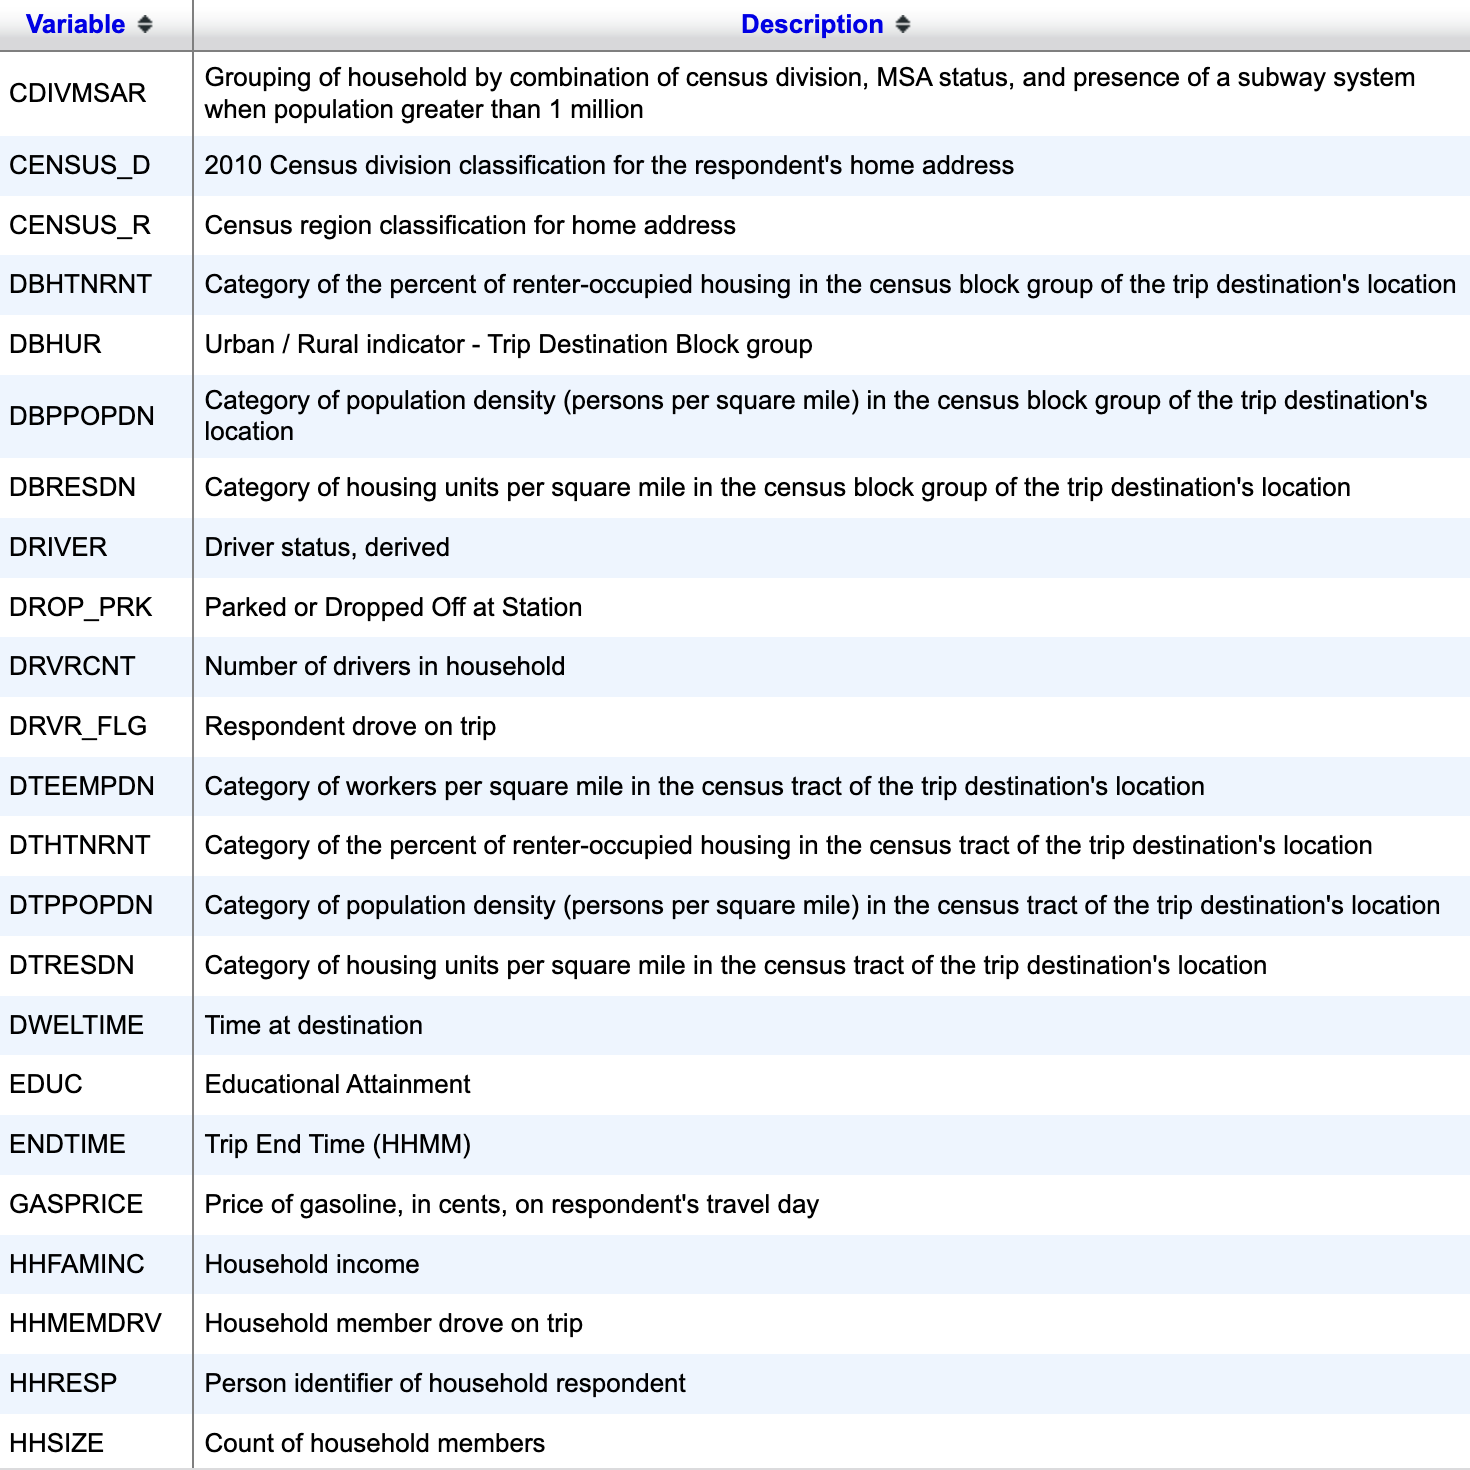

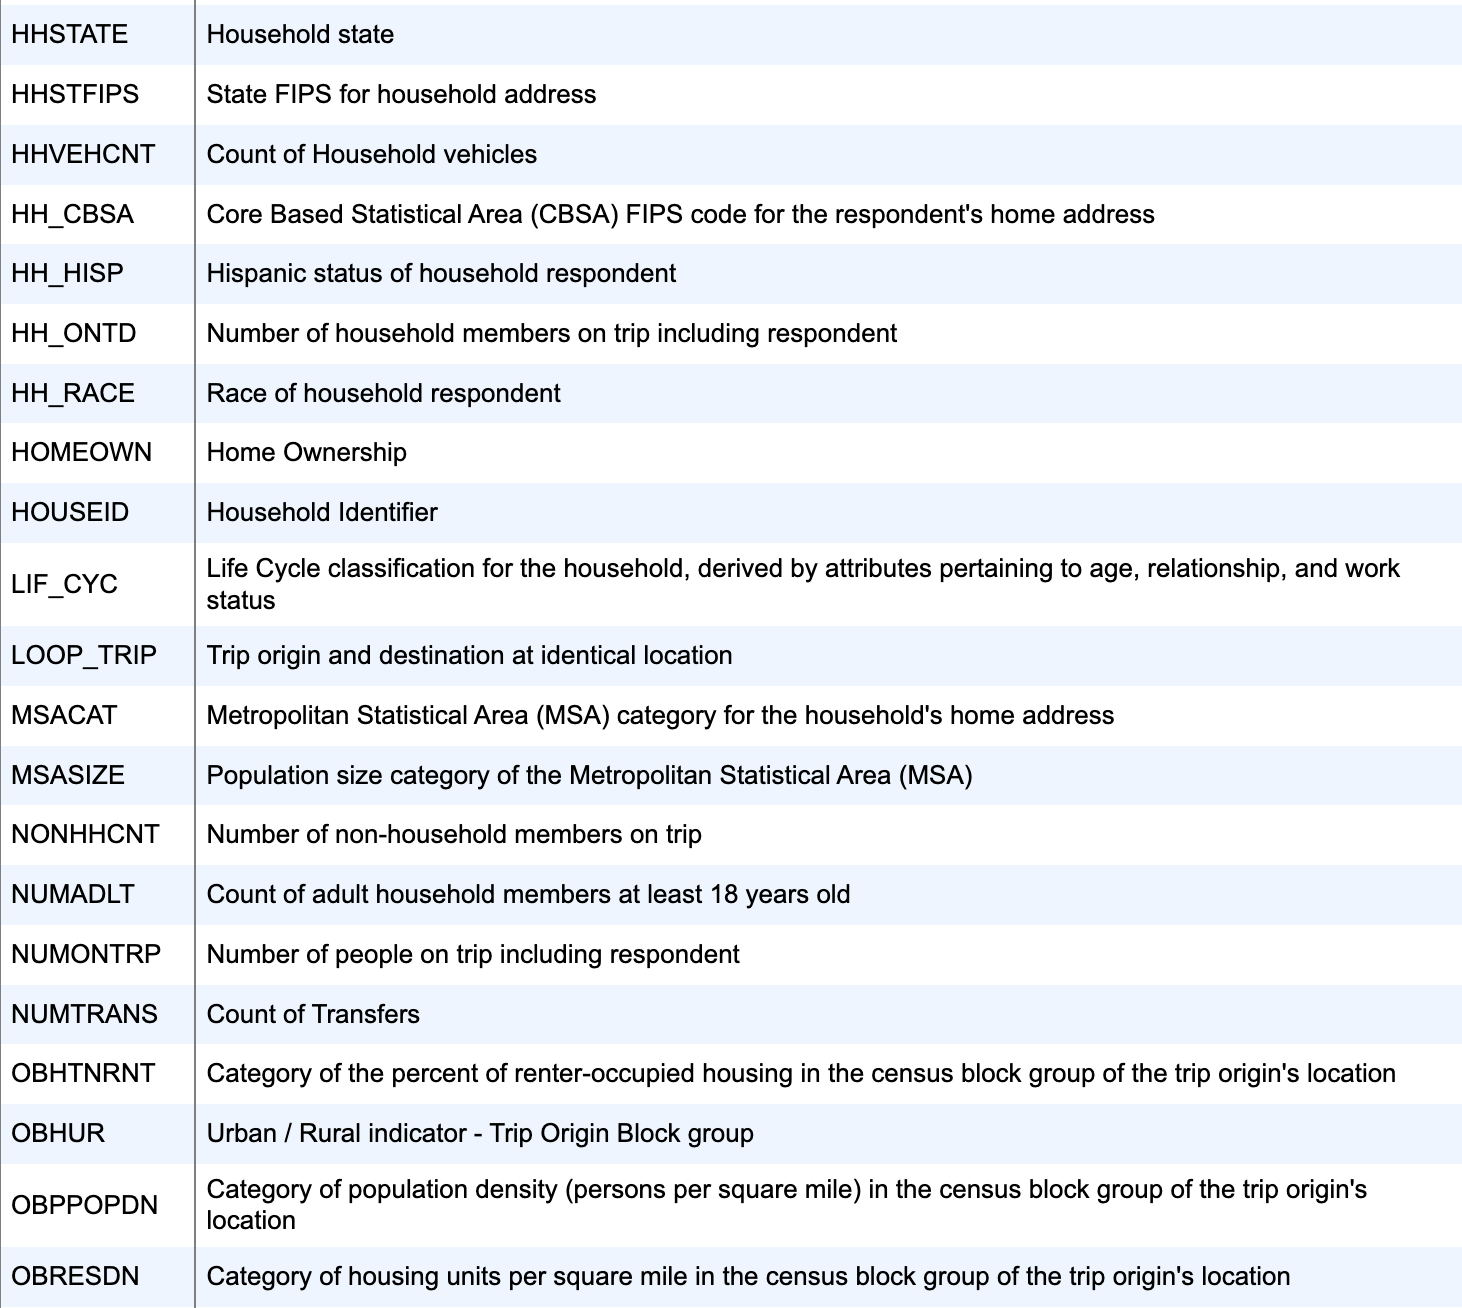

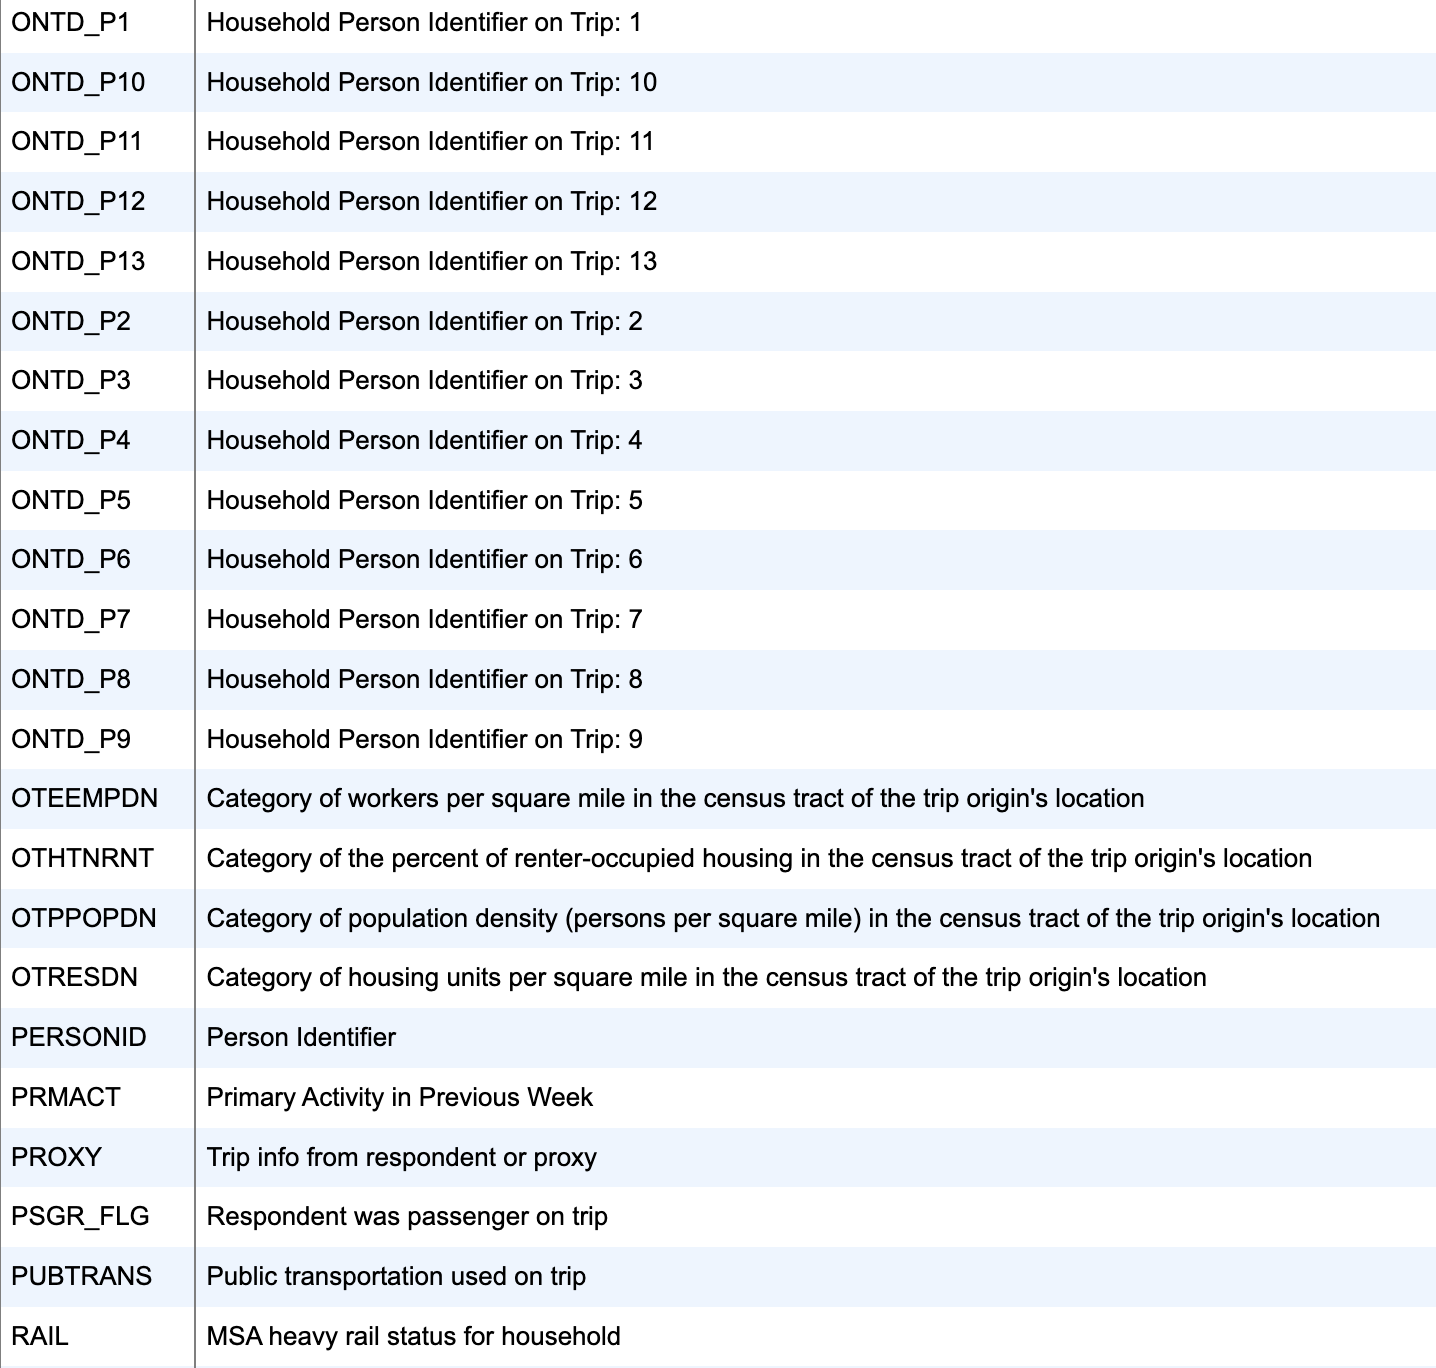

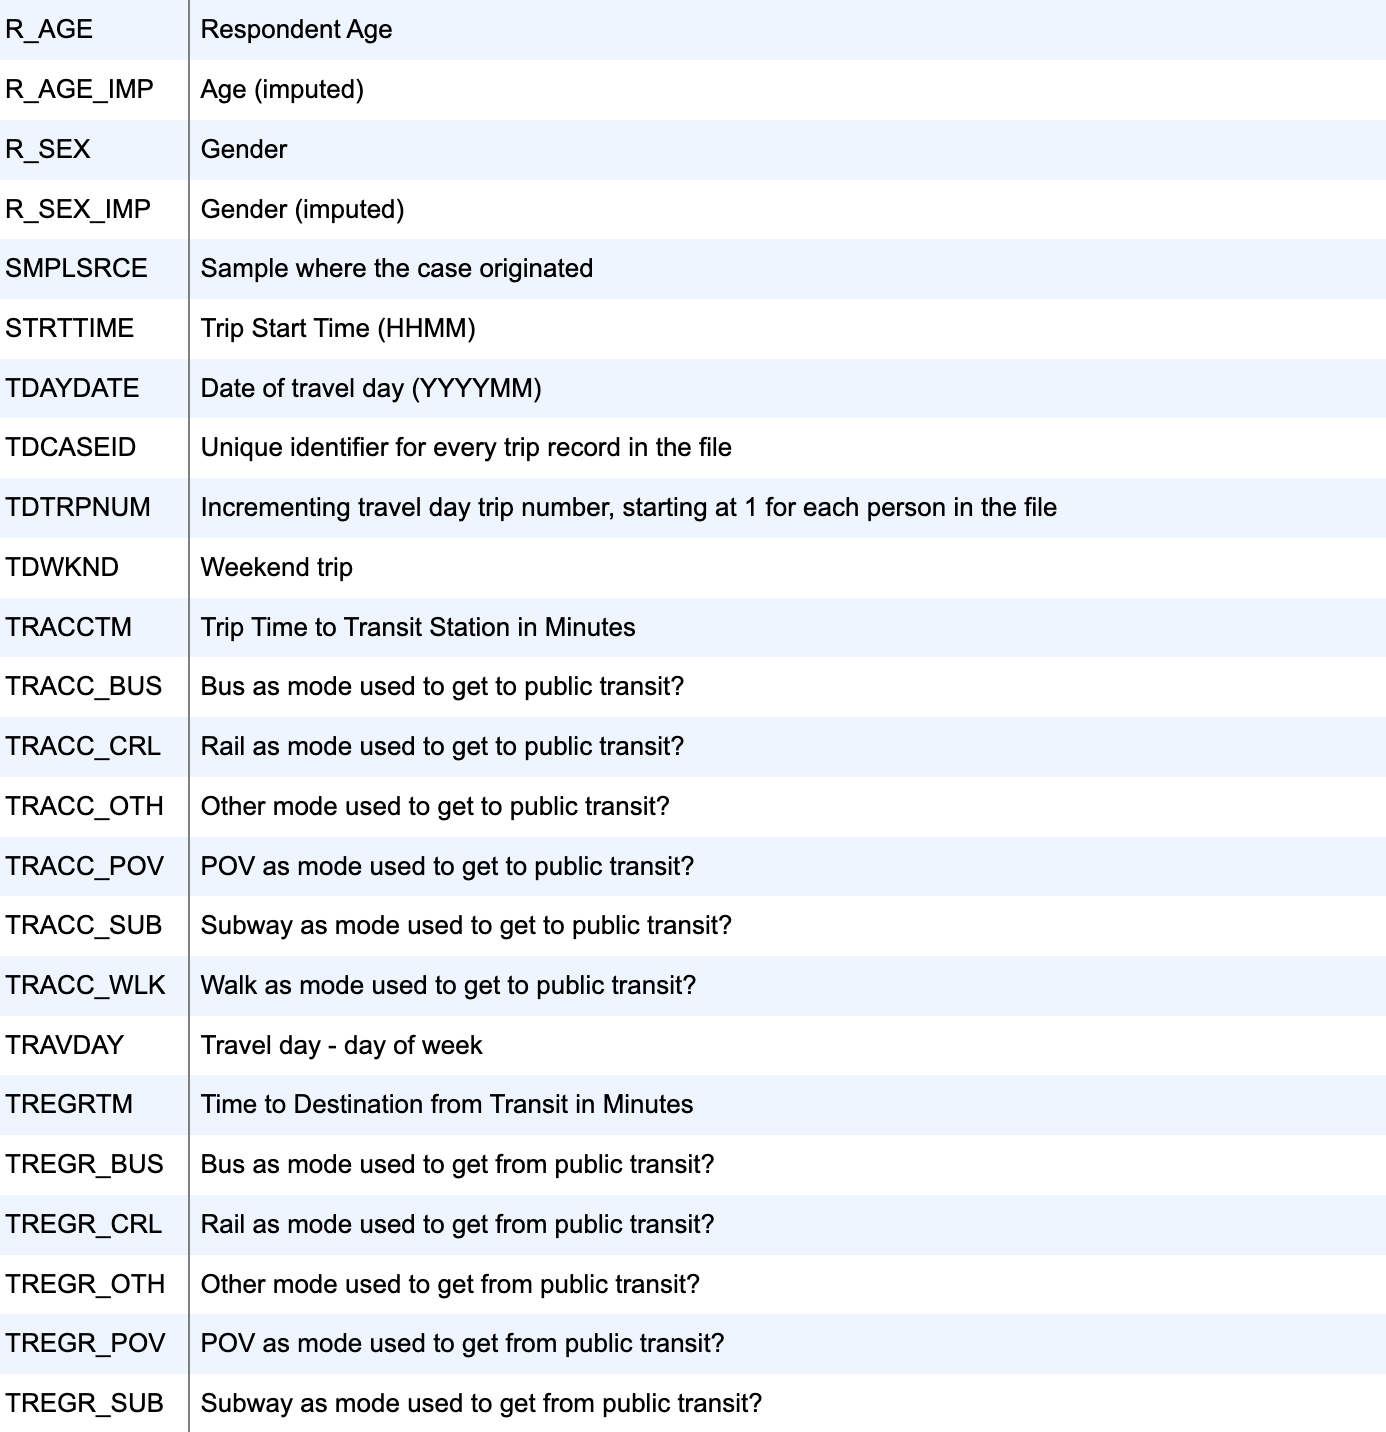

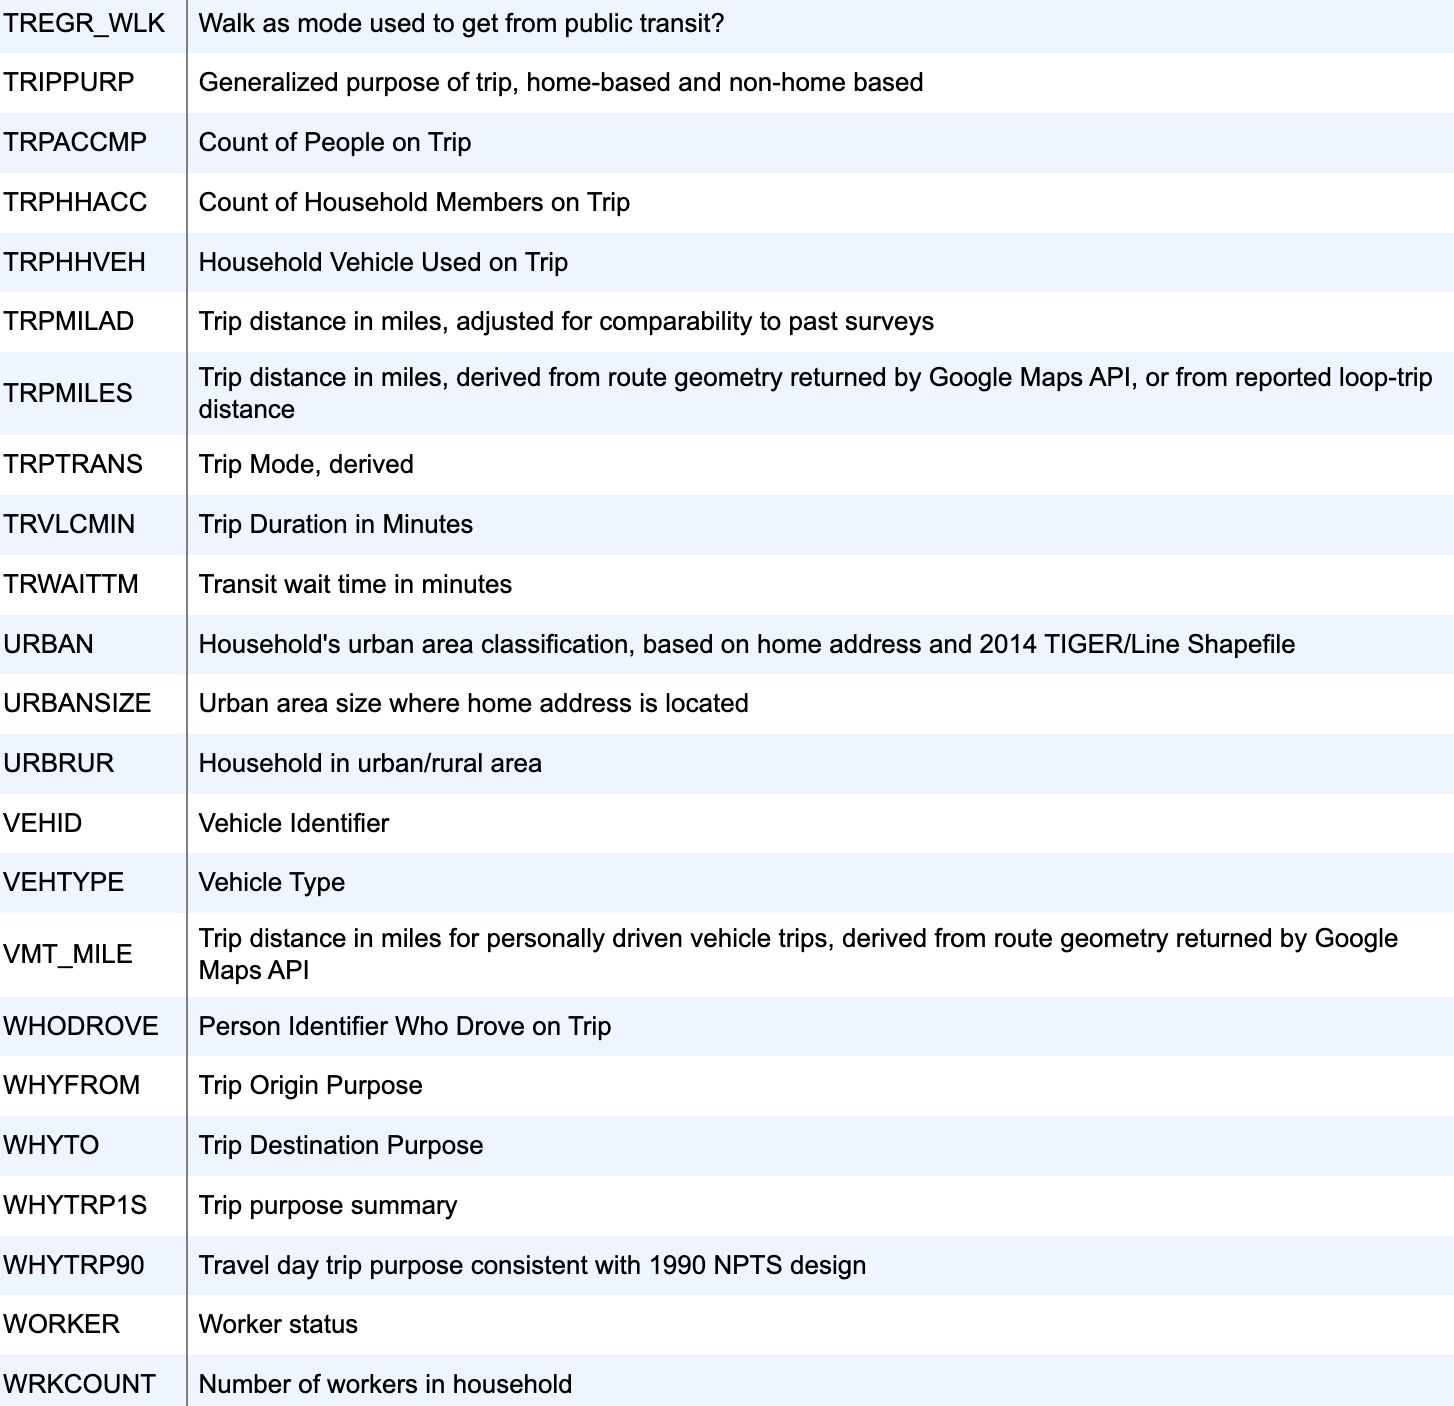

TRPMILES: Trip distance in miles, derived from route geometry returned by Google Maps API, or from reported loop-trip distance

TRPTRANS: Trip Mode, derived

VMT_MILE: Trip distance in miles for personally driven vehicle trips, derived from route geometry returned by Google Maps API

PUBTRANS: Public transportation used on trip

TRACC_BUS: Bus as mode used to get to public transit?

TRACC_CRL: Rail as mode used to get to public transit?

TRACC_OTH: Other mode used to get to public transit?

TRACC_POV: POV as mode used to get to public transit?

TRACC_SUB: Subway as mode used to get to public transit?

TRACC_WLK: Walk as mode used to get to public transit?

TRPHHVEH: Household Vehicle Used on Trip

In [16]:
attr = ['HOUSEID','PERSONID','TDTRPNUM','TRPMILES','TRPTRANS','VMT_MILE','PUBTRANS']
t = trip[attr]
t

HOUSEID  PERSONID  TDTRPNUM  TRPMILES  TRPTRANS  VMT_MILE  PUBTRANS
0       30000007         1         1     5.244         3     5.244         2
1       30000007         1         2     5.149         3     5.149         2
2       30000007         2         1    84.004         6    84.004         2
3       30000007         2         2    81.628         6    81.628         2
4       30000007         3         1     2.250         3     2.250         2
...          ...       ...       ...       ...       ...       ...       ...
923567  50515573         1         1     1.168         1    -1.000         2
923568  50515573         1         2     0.238         1    -1.000         2
923569  50515573         1         3     0.238         1    -1.000         2
923570  50515573         1         4     0.867         1    -1.000         2
923571  50515573         1         5     0.325         1    -1.000         2

[923572 rows x 7 columns]

In [17]:
t['PUBTRANS'].value_counts()

2    912482
1     11090
Name: PUBTRANS, dtype: int64

In [18]:
t['TRPTRANS'].value_counts()

 3     396931
 4     229466
 6     108303
 1      81288
 5      60463
 10     11313
 2       8034
 11      6616
 97      3515
 16      3326
 17      2813
 8       2088
 18      2006
 19      1823
 13      1581
 15      1148
 7        826
 9        814
 12       624
 20       458
 14       120
-8         13
-7          2
-9          1
Name: TRPTRANS, dtype: int64

In [19]:
t = t.drop(t[(t['TRPTRANS']==19) | (t['TRPTRANS']==97)].index)
t.reset_index(inplace=True)
t = t.drop(columns=['index'])

In [20]:
t

HOUSEID  PERSONID  TDTRPNUM  TRPMILES  TRPTRANS  VMT_MILE  PUBTRANS
0       30000007         1         1     5.244         3     5.244         2
1       30000007         1         2     5.149         3     5.149         2
2       30000007         2         1    84.004         6    84.004         2
3       30000007         2         2    81.628         6    81.628         2
4       30000007         3         1     2.250         3     2.250         2
...          ...       ...       ...       ...       ...       ...       ...
918229  50515573         1         1     1.168         1    -1.000         2
918230  50515573         1         2     0.238         1    -1.000         2
918231  50515573         1         3     0.238         1    -1.000         2
918232  50515573         1         4     0.867         1    -1.000         2
918233  50515573         1         5     0.325         1    -1.000         2

[918234 rows x 7 columns]

In [ ]:
## metro=0.11/km
## bus=0.105/km
## motorcycle=0.103/km
## gasolinecar=0.192/km
## electricvehicle=0.053/km
## 1 mile = 1.6 km

## '01'="Walk" 0
## '02'="Bicycle" 0
## '03'="Car" 0.192/km
## '04'="SUV" 0.192/km
## '05'="Van" 0.192/km
## '06'="Pickup truck" 0.192/km
## '07'="Golf cart / Segway" 0.192/km
## '08'="Motorcycle / Moped" 0.103/km
## '09'="RV (motor home, ATV, snowmobile)" 0.103/km
## '10'="School bus" 0.105/km
## '11'="Public or commuter bus" 0.105/km
## '12'="Paratransit / Dial-a-ride" 0.105/km
## '13'="Private / Charter / Tour / Shuttle bus" 0.105/km
## '14'="City-to-city bus (Greyhound, Megabus)" 0.105/km
## '15'="Amtrak / Commuter rail" 0.11/km
## '16'="Subway / elevated / light rail / street car" 0.11/km
## '17'="Taxi / limo (including Uber / Lyft)" 0.192/km
## '18'="Rental car (Including Zipcar / Car2Go)" 0.192/km
## '19'="Airplane" 0.105/km ???
## '20'="Boat / ferry / water taxi" 0.105/km ???
## '97'="Something Else" 0.053/km ???


In [21]:
emission = []
trans = t['TRPTRANS']
for i in range(len(t)):
    if trans[i] in [1,2]:
        e = 0
    elif trans[i] in [3,4,5,6,7,17,18]:
        e = t['TRPMILES'][i]* 1.6 * 0.192
    elif trans[i] in [8,9]:
        e = t['TRPMILES'][i]* 1.6 * 0.103
    elif trans[i] in [10,11,12,13,14]:
        e = t['TRPMILES'][i]* 1.6 * 0.105
    elif trans[i] in [15,16]:
        e = t['TRPMILES'][i]* 1.6 * 0.11
    else:
        e = t['TRPMILES'][i]* 1.6 * 0.053
    emission.append(e)


In [22]:
t['EMISSION'] = emission

In [23]:
t

HOUSEID  PERSONID  TDTRPNUM  TRPMILES  TRPTRANS  VMT_MILE  PUBTRANS  \
0       30000007         1         1     5.244         3     5.244         2   
1       30000007         1         2     5.149         3     5.149         2   
2       30000007         2         1    84.004         6    84.004         2   
3       30000007         2         2    81.628         6    81.628         2   
4       30000007         3         1     2.250         3     2.250         2   
...          ...       ...       ...       ...       ...       ...       ...   
918229  50515573         1         1     1.168         1    -1.000         2   
918230  50515573         1         2     0.238         1    -1.000         2   
918231  50515573         1         3     0.238         1    -1.000         2   
918232  50515573         1         4     0.867         1    -1.000         2   
918233  50515573         1         5     0.325         1    -1.000         2   

         EMISSION  
0        1.610957  
1        1.581773  
2       25.806029  
3       25.076122  
4        0.691200  
...           ...  
918229   0.000000  
918230   0.000000  
918231   0.000000  
918232   0.000000  
918233   0.000000  

[918234 rows x 8 columns]

In [24]:
tt = t.drop(t[t['TRPTRANS']<0].index)
tt.reset_index(inplace=True)
tt = tt.drop(columns=['index'])
tt

HOUSEID  PERSONID  TDTRPNUM  TRPMILES  TRPTRANS  VMT_MILE  PUBTRANS  \
0       30000007         1         1     5.244         3     5.244         2   
1       30000007         1         2     5.149         3     5.149         2   
2       30000007         2         1    84.004         6    84.004         2   
3       30000007         2         2    81.628         6    81.628         2   
4       30000007         3         1     2.250         3     2.250         2   
...          ...       ...       ...       ...       ...       ...       ...   
918213  50515573         1         1     1.168         1    -1.000         2   
918214  50515573         1         2     0.238         1    -1.000         2   
918215  50515573         1         3     0.238         1    -1.000         2   
918216  50515573         1         4     0.867         1    -1.000         2   
918217  50515573         1         5     0.325         1    -1.000         2   

         EMISSION  
0        1.610957  
1        1.581773  
2       25.806029  
3       25.076122  
4        0.691200  
...           ...  
918213   0.000000  
918214   0.000000  
918215   0.000000  
918216   0.000000  
918217   0.000000  

[918218 rows x 8 columns]

In [25]:
house = []
person = []
emission = []    
for i in range(len(tt)):
    if i == 0:
        h_id = tt['HOUSEID'][i]
        p_id = tt['PERSONID'][i]
        emis = tt['EMISSION'][i]
    else:
        if tt['HOUSEID'][i] == h_id:
            if tt['PERSONID'][i] == p_id:
                emis += tt['EMISSION'][i]
            else:
                house.append(h_id)
                person.append(p_id)
                emission.append(emis)
                p_id = tt['PERSONID'][i]
                emis = tt['EMISSION'][i]
        else:
            house.append(h_id)
            person.append(p_id)
            emission.append(emis)
            h_id = tt['HOUSEID'][i]
            p_id = tt['PERSONID'][i]
            emis = tt['EMISSION'][i]

In [26]:
dic = {'HOUSEID':house,'PERSONID':person,'EMISSION':emission}
pers_emi = DataFrame(dic)
pers_emi

HOUSEID  PERSONID   EMISSION
0       30000007         1   3.192730
1       30000007         2  50.882150
2       30000007         3   1.380250
3       30000008         1   4.925645
4       30000012         1  38.958182
...          ...       ...        ...
218742  40794293         1  13.325107
218743  40794293         2  13.115290
218744  40794301         2   9.124762
218745  40794301         3   6.217421
218746  40794301         6   5.737574

[218747 rows x 3 columns]

In [27]:
pers_emi = pers_emi.drop(pers_emi[pers_emi['EMISSION']>3000].index)
pers_emi.reset_index(inplace=True)
pers_emi = pers_emi.drop(columns=['index'])
pers_emi

HOUSEID  PERSONID   EMISSION
0       30000007         1   3.192730
1       30000007         2  50.882150
2       30000007         3   1.380250
3       30000008         1   4.925645
4       30000012         1  38.958182
...          ...       ...        ...
218741  40794293         1  13.325107
218742  40794293         2  13.115290
218743  40794301         2   9.124762
218744  40794301         3   6.217421
218745  40794301         6   5.737574

[218746 rows x 3 columns]

In [28]:
pers_emi.describe()

HOUSEID       PERSONID       EMISSION
count  2.187460e+05  218746.000000  218746.000000
mean   3.497140e+07       1.757061      11.571482
std    5.049581e+06       0.997324      23.890772
min    3.000001e+07       1.000000      -5.529600
25%    3.025901e+07       1.000000       2.520576
50%    3.051877e+07       1.000000       6.118195
75%    4.036454e+07       2.000000      12.807168
max    4.079430e+07      11.000000    1903.828070

<AxesSubplot:>

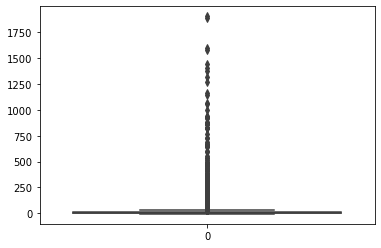

In [188]:
sns.boxplot(data=pers_emi['EMISSION'])

<AxesSubplot:>

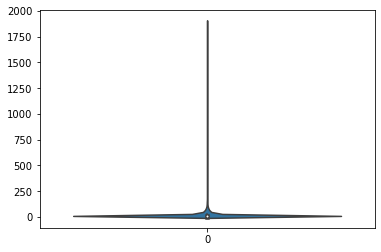

In [189]:
sns.violinplot(data=pers_emi['EMISSION'],size=100)

# 3. Cluster_Emission

In [190]:
p_0 = new_p[new_p['LABEL']==0]
p_1 = new_p[new_p['LABEL']==1]
p_2 = new_p[new_p['LABEL']==2]
p_3 = new_p[new_p['LABEL']==3]
p_4 = new_p[new_p['LABEL']==4]
p_5 = new_p[new_p['LABEL']==5]

In [29]:
emi  = pd.merge(pers_emi,pp,how='inner',on=['HOUSEID','PERSONID'])

In [32]:
emi.to_csv('emission.csv',index=False)

In [191]:
emi_0 = pd.merge(pers_emi,p_0,how='inner',on=['HOUSEID','PERSONID'])
emi_1 = pd.merge(pers_emi,p_1,how='inner',on=['HOUSEID','PERSONID'])
emi_2 = pd.merge(pers_emi,p_2,how='inner',on=['HOUSEID','PERSONID'])
emi_3 = pd.merge(pers_emi,p_3,how='inner',on=['HOUSEID','PERSONID'])
emi_4 = pd.merge(pers_emi,p_4,how='inner',on=['HOUSEID','PERSONID'])
emi_5 = pd.merge(pers_emi,p_5,how='inner',on=['HOUSEID','PERSONID'])
emi_0

HOUSEID  PERSONID   EMISSION  R_AGE  OCCAT  HHFAMINC  NUMCHD  LABEL
0      30000008         1   4.925645     55      4         8       0      0
1      30000137         2   4.190208     57      3         6       0      0
2      30000145         1   1.954406     59      4         7       0      0
3      30000145         2   6.912922     52      2         7       0      0
4      30000262         2   4.139520     59      2         6       0      0
...         ...       ...        ...    ...    ...       ...     ...    ...
26448  40794135         1   3.184435     52      1         5       1      0
26449  40794168         1   4.338893     54      4         6       0      0
26450  40794168         2  22.385050     62      1         6       0      0
26451  40794233         2   5.014733     60      4         8       0      0
26452  40794301         2   9.124762     59      4         6       3      0

[26453 rows x 8 columns]

In [192]:
emi_0['EMISSION'].mean()

12.931850723925454

In [193]:
emi_1['EMISSION'].mean()

12.637710109337478

In [194]:
emi_2['EMISSION'].mean()

13.672627564969453

In [195]:
emi_3['EMISSION'].mean()

11.507670643570082

In [196]:
emi_4['EMISSION'].mean()

19.482664214285712

In [197]:
emi_5['EMISSION'].mean()

12.180634335938857

In [236]:
temp = pd.merge(pers_emi,new_p,how='inner',on=['HOUSEID','PERSONID'])

In [237]:
temp

HOUSEID  PERSONID   EMISSION  R_AGE  OCCAT  HHFAMINC  NUMCHD  LABEL
0      30000007         2  50.882150     66      2         7       0      5
1      30000008         1   4.925645     55      4         8       0      0
2      30000012         1  38.958182     45      4        10       0      2
3      30000039         1   8.644915     82      4        10       0      5
4      30000041         1  43.661107     44      4        11       0      2
...         ...       ...        ...    ...    ...       ...     ...    ...
96334  40794238         1   4.637184     41      4         7       1      2
96335  40794238         2  11.316634     40      4         7       1      1
96336  40794241         2  10.842317     39      4         6       0      1
96337  40794260         1  13.685146     35      4        11       3      1
96338  40794301         2   9.124762     59      4         6       3      0

[96339 rows x 8 columns]

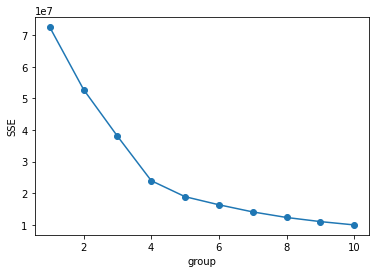

In [238]:
SSE = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(temp[['R_AGE','OCCAT','HHFAMINC','NUMCHD','EMISSION']])
    SSE.append(km.inertia_)
plt.plot(range(1,11), SSE, marker='o')
plt.xlabel(u'group')
plt.ylabel(u'SSE')
plt.show()

In [239]:
#n_cluster = 6
kmodel = KMeans(n_clusters=5)
kmodel.fit(temp[['R_AGE','OCCAT','HHFAMINC','NUMCHD','EMISSION']])
label = pd.Series(kmodel.labels_)
lb = kmodel.predict(temp[['R_AGE','OCCAT','HHFAMINC','NUMCHD','EMISSION']])

num = pd.Series(kmodel.labels_).value_counts()
center = pd.DataFrame(kmodel.cluster_centers_)
r = pd.concat([center, num], axis = 1)
r.columns = list(temp[['R_AGE','OCCAT','HHFAMINC','NUMCHD','EMISSION']].columns) + [u'num']
print(r)

       R_AGE     OCCAT  HHFAMINC    NUMCHD    EMISSION    num
0  31.967438  3.040733  6.711997  0.876574    8.543743  40759
1  47.106887  3.169697  7.400413  0.636915   45.705314   7248
2  45.981390  3.693548  7.389578  0.589330  141.511822    806
3  37.388889  2.722222  4.666667  0.611111  991.133621     18
4  56.939434  3.116437  7.024146  0.304071    8.689271  47508
